In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, roc_auc_score
import warnings
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv('C:\\Users\\njomz\\PycharmProjects\\MedicAi\\diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
desc=df.describe().T

In [8]:
missing_values=df.isnull().sum()
print("Missing Values: ")
print(missing_values)

Missing Values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df.select_dtypes(include='int64').nunique()

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
Age               52
Outcome            2
dtype: int64

In [10]:
#check duplicate values
df.duplicated().sum()

0

In [11]:
diabetes_zero = round((len(df[df['Outcome']==0]) / len(df)) * 100, 2)
print(f'{diabetes_zero}% of the data in the dataset has 0 in diabetes outcome')
diabetes_notzero = round((len(df[df['Outcome']!=0]) / len(df)) * 100, 2)
print(f'{diabetes_notzero}% of the data in the dataset has 1 in diabetes outcome')


65.1% of the data in the dataset has 0 in diabetes outcome
34.9% of the data in the dataset has 1 in diabetes outcome


In [12]:
pregnancies_zero=round((len(df[df['Pregnancies']==0])/len(df))*100,2)
print(f'{pregnancies_zero}% of the data in the dataset has 0 in prgnancies outcome')

preg_count=df.Pregnancies.value_counts()
preg_count

glucose_zero=round((len(df[df['Glucose']==0])/len(df))*100,2)
print(f'{glucose_zero}%  of the data in the dataset has 0 in Glucose outcome')

bloodpressure_zero=round((len(df[df['BloodPressure']==0])/len(df))*100,2)
print(f'{bloodpressure_zero}%  of the data in the dataset has 0 in Glucose outcome')

skinthickness_zero=round((len(df[df['SkinThickness']==0])/len(df))*100,2)
print(f'{skinthickness_zero}% of the data in the dataset has 0 in SkinThickness outcome')

insulin_zero=round((len(df[df['Insulin']==0])/len(df))*100,2)
print(f'{insulin_zero}% of the data in the dataset has 0 in Insulin outcome')

bmi_zero=round((len(df[df['BMI']==0])/len(df))*100,2)
print(f'{bmi_zero}% of the data in the dataset has 0 in BMI outcome')


14.45% of the data in the dataset has 0 in prgnancies outcome
0.65%  of the data in the dataset has 0 in Glucose outcome
4.56%  of the data in the dataset has 0 in Glucose outcome
29.56% of the data in the dataset has 0 in SkinThickness outcome
48.7% of the data in the dataset has 0 in Insulin outcome
1.43% of the data in the dataset has 0 in BMI outcome


Patients with Diabetes: 268
Patients without Diabetes: 500


<Axes: xlabel='Outcome', ylabel='count'>

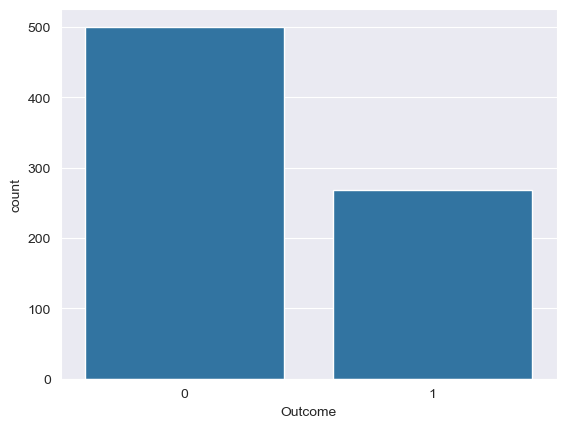

In [13]:
with_diabetes = df['Outcome'].value_counts()[1]
without_diabetes = df['Outcome'].value_counts()[0]
print(f"Patients with Diabetes: {with_diabetes}\nPatients without Diabetes: {without_diabetes}")

sns.countplot(x="Outcome", data=df)

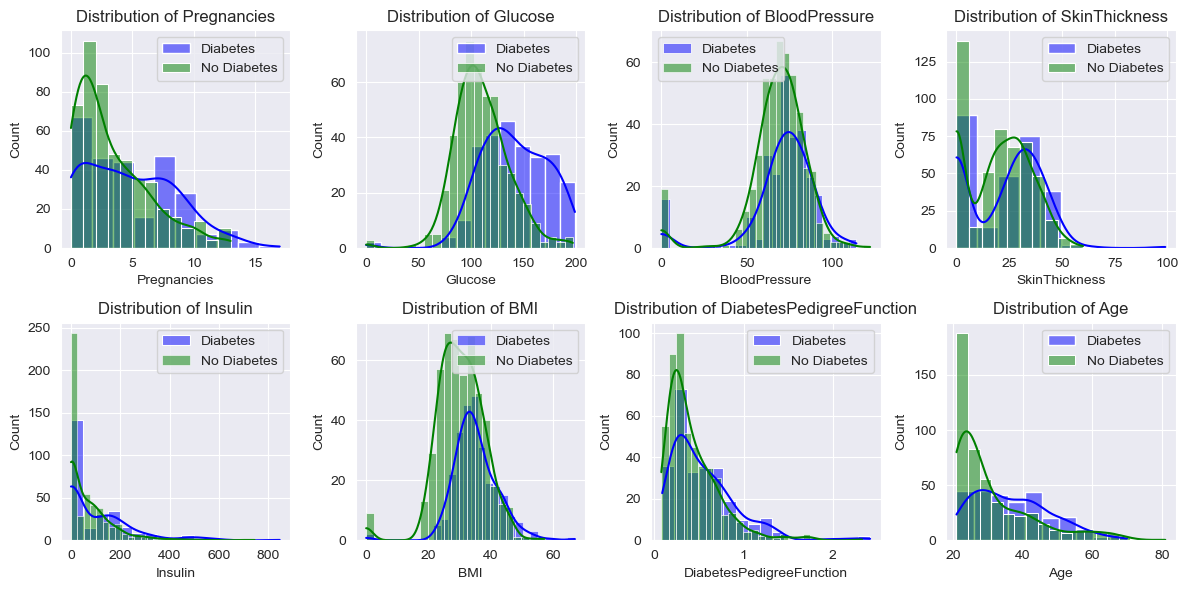

In [14]:
plt.figure(figsize=(12,6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2,4,i+1)
    sns.histplot(df[df['Outcome']==1][col], kde=True, label='Diabetes', color='blue')
    sns.histplot(df[df['Outcome']==0][col], kde=True, label='No Diabetes', color='green')
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

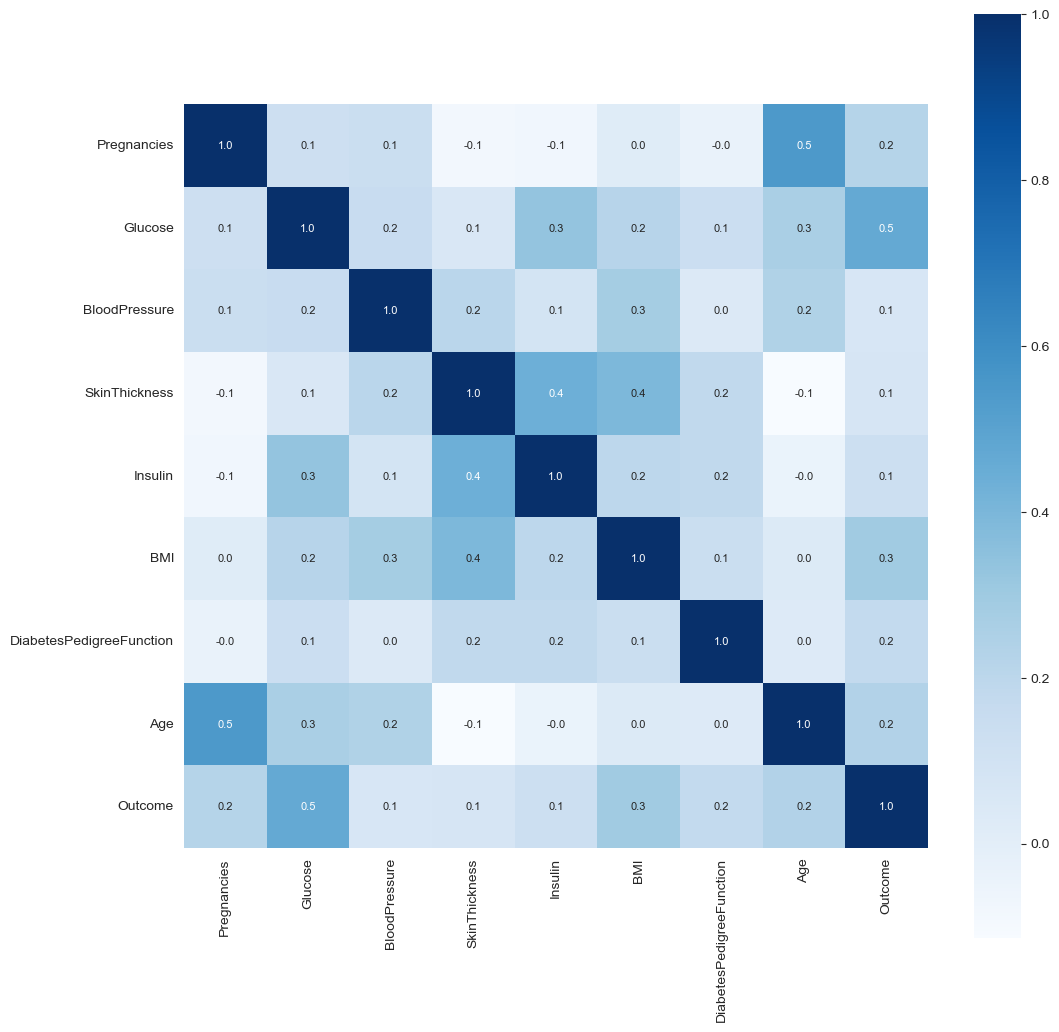

In [15]:
# Calculate correlation matrix
corr = df.corr()
# constructing a heatmap to understand the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, 
            annot_kws={'size':8}, cmap='Blues')

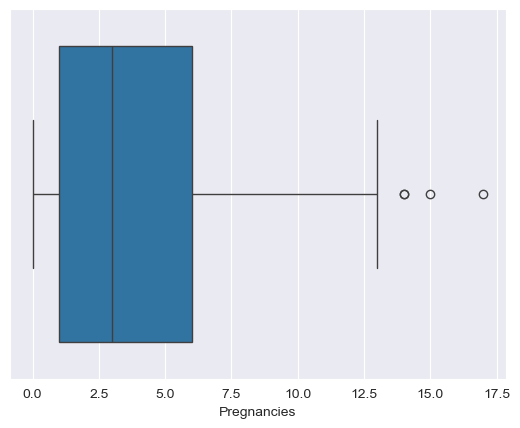

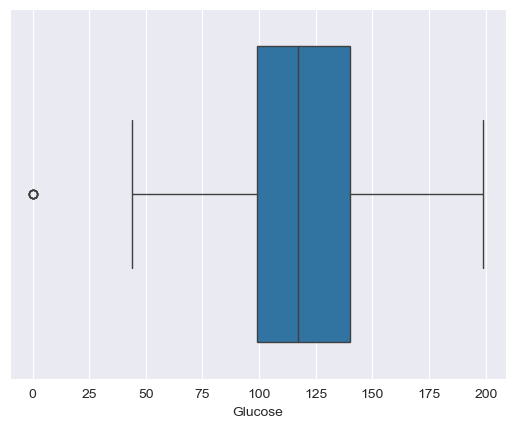

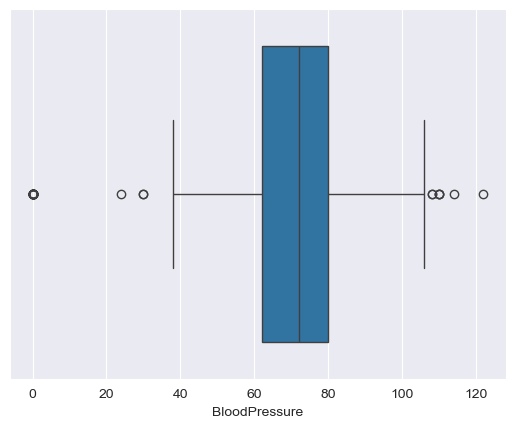

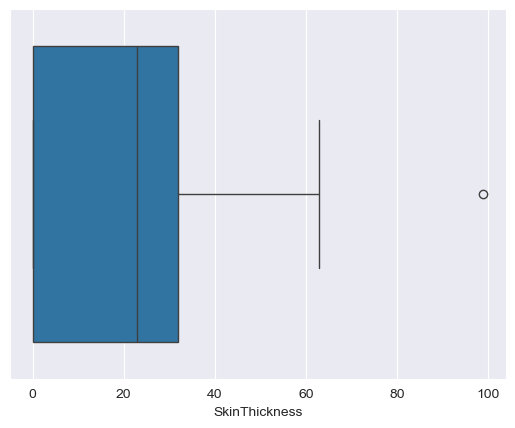

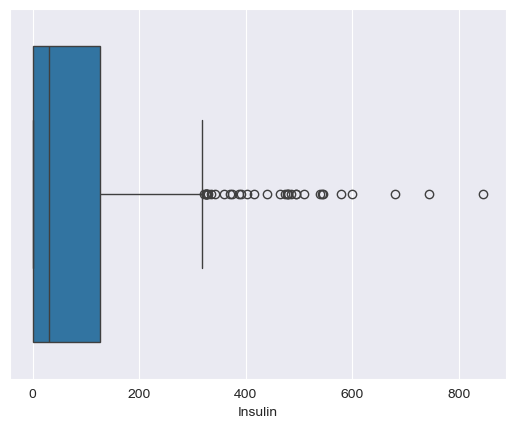

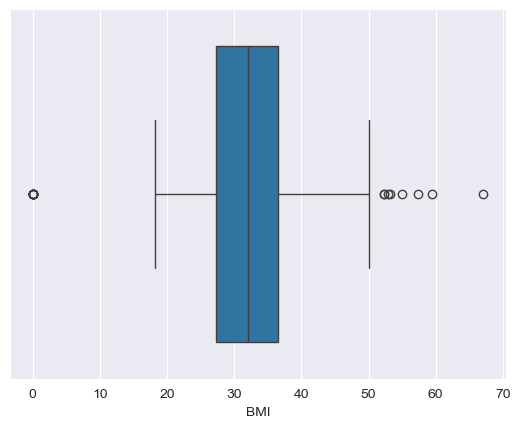

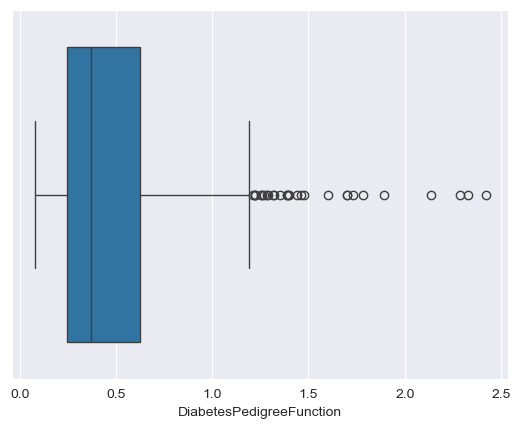

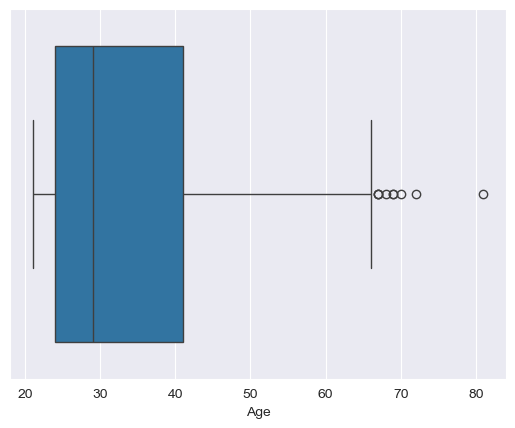

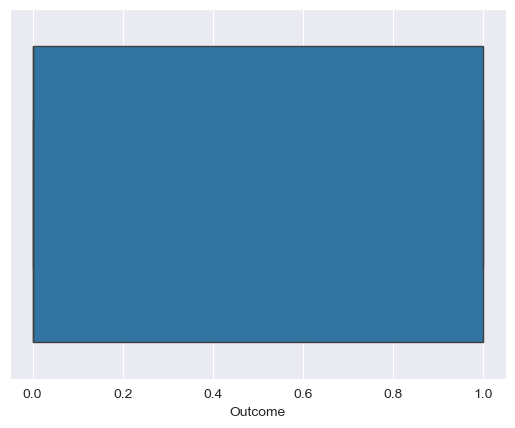

In [16]:
#outliners

for c in df.columns:
    plt.figure()
    sns.boxplot(x=c, data=df, orient="v")

In [17]:
describe = df.describe()

def cleanColumn(data,columns, thr = 2):
    column_desc = describe[columns]

    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1

    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR

    filter_clm_bottom = bottom_limit_clm < data[columns]
    filter_clm_top = data[columns] < top_limit_clm

    filters = filter_clm_bottom & filter_clm_top

    data = data[filters]

    print("{} of dataset after column {}".format(data.shape, columns))

    return data

In [18]:
for i in df.columns:
    data=cleanColumn(df,i)

(767, 9) of dataset after column Pregnancies
(763, 9) of dataset after column Glucose
(731, 9) of dataset after column BloodPressure
(767, 9) of dataset after column SkinThickness
(746, 9) of dataset after column Insulin
(754, 9) of dataset after column BMI
(753, 9) of dataset after column DiabetesPedigreeFunction
(767, 9) of dataset after column Age
(768, 9) of dataset after column Outcome


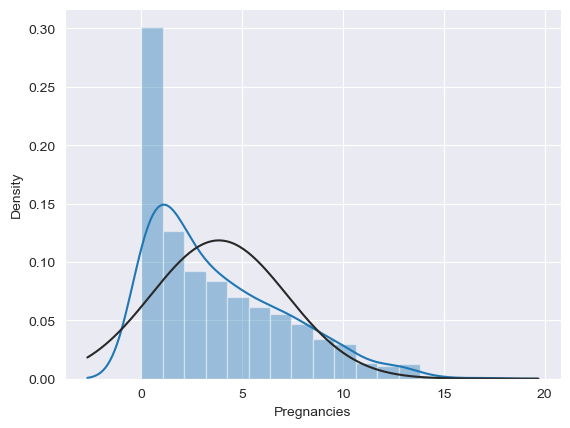

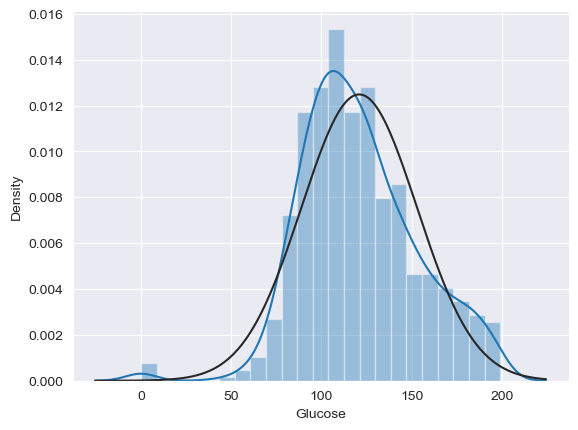

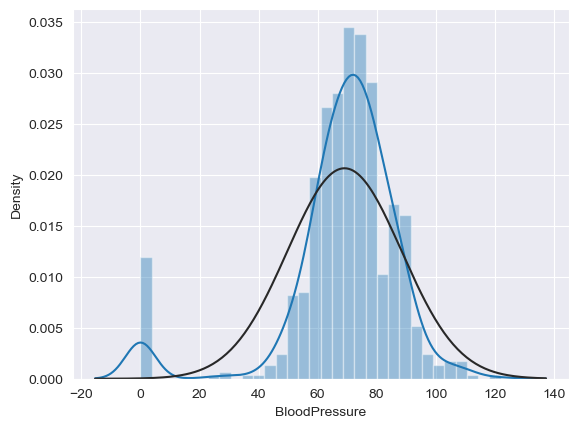

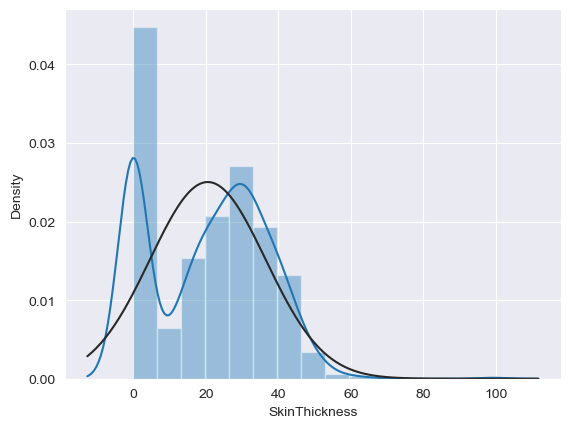

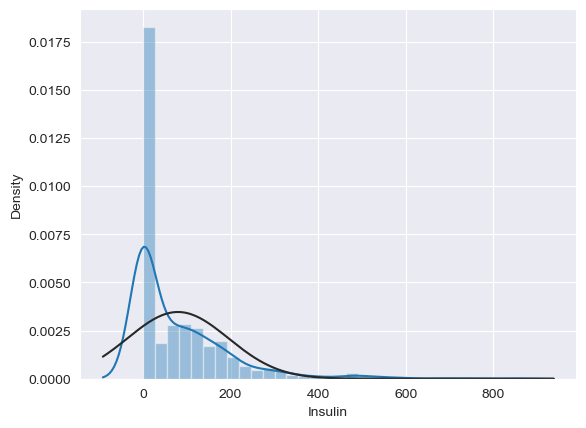

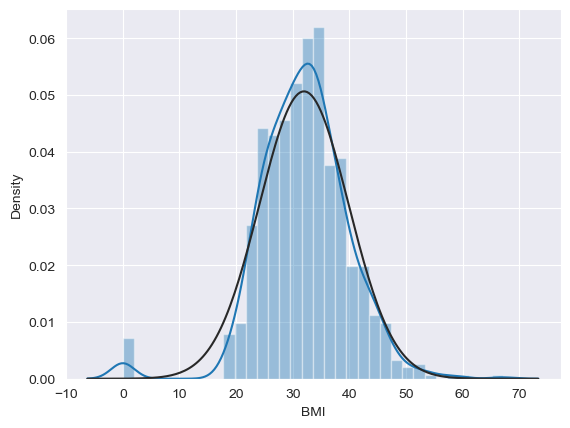

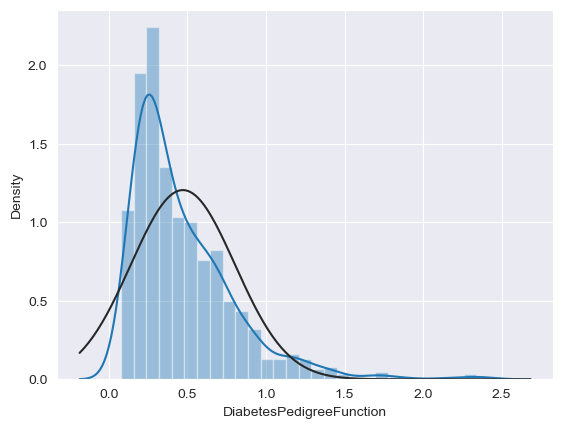

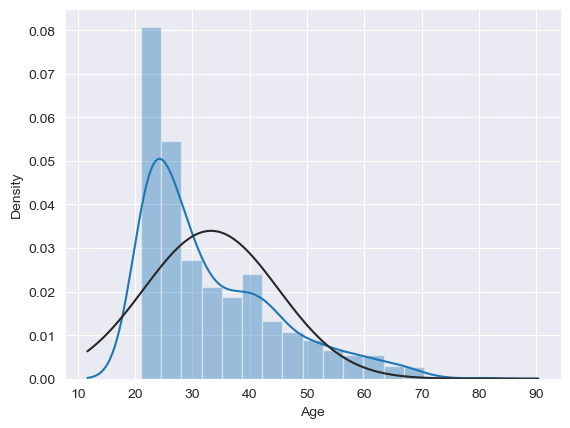

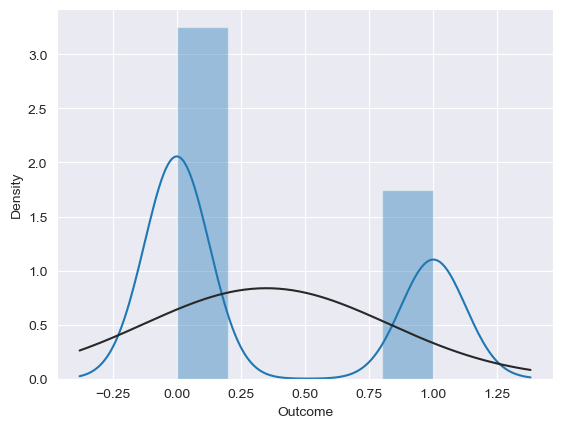

In [19]:
for i in df.columns:
    plt.figure() 
    sns.distplot(df[i], fit=norm)
    plt.show()

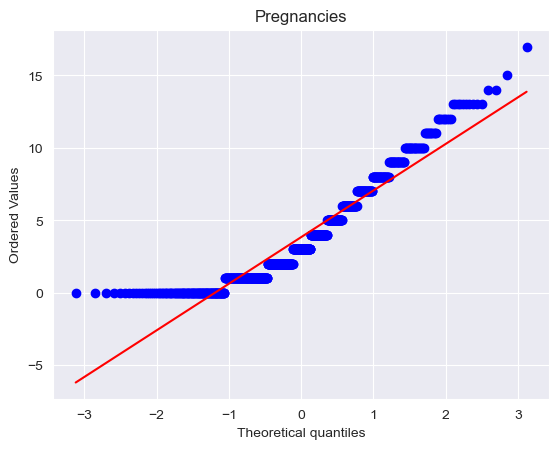

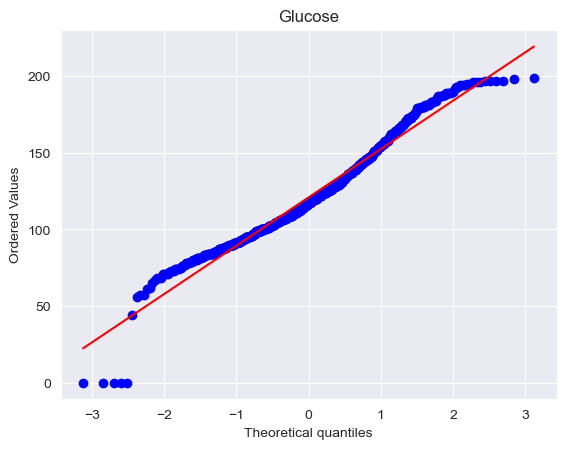

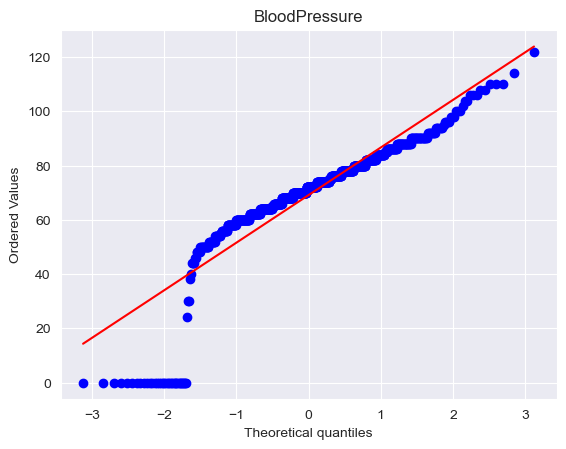

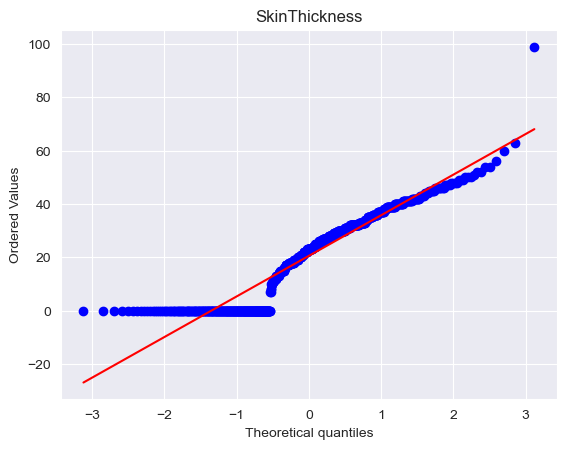

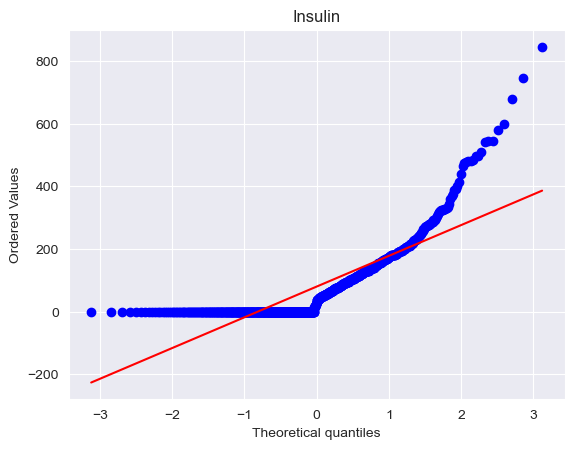

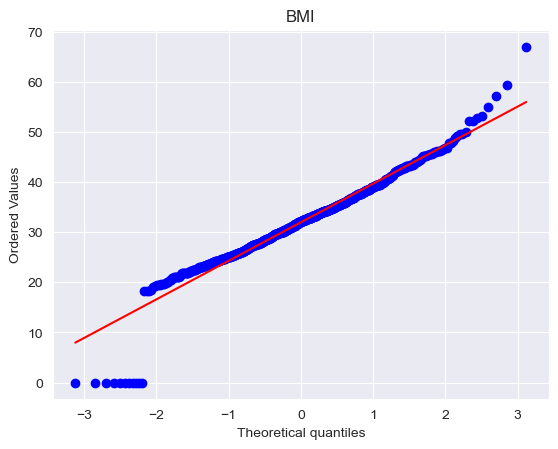

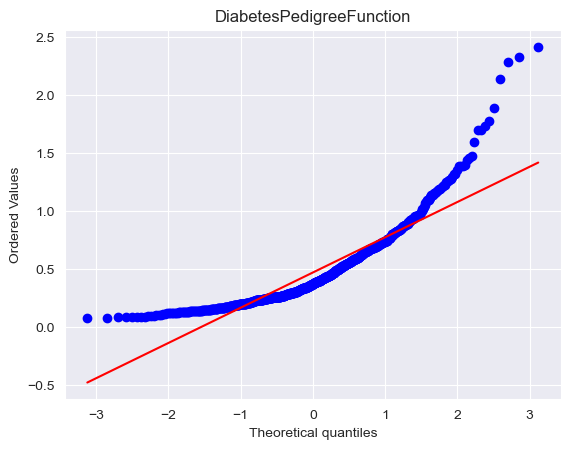

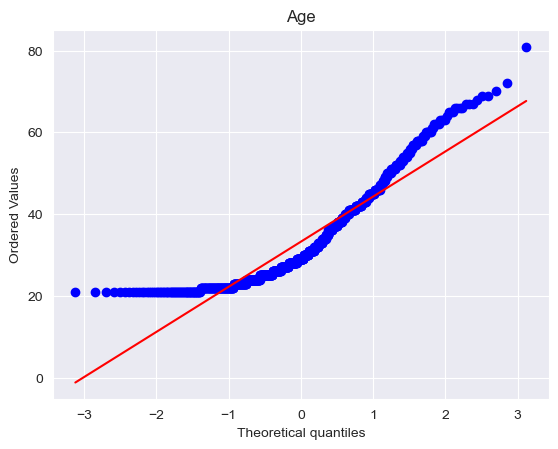

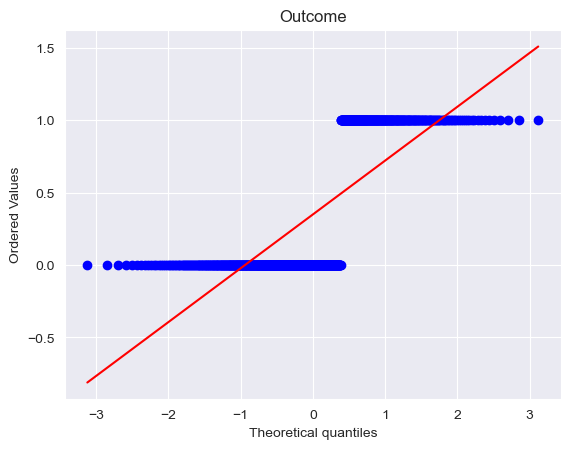

In [20]:
for i in df.columns:
    plt.figure()
    stats.probplot(df[i], plot = plt)
    plt.title(i)
    plt.show()

In [21]:
# Calculate skewness for numerical features
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed': skewed_feats})

# Display the skewness information
print(skewness)


                            Skewed
Insulin                   2.267810
DiabetesPedigreeFunction  1.916159
Age                       1.127389
Pregnancies               0.899912
Outcome                   0.633776
Glucose                   0.173414
SkinThickness             0.109159
BMI                      -0.428143
BloodPressure            -1.840005


In [22]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)


In [24]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [25]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.75


In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred1 = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred1)
print(f'Decision Tree Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.69


In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred2 = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred2)
print(f'Random Forest Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.75


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred3 = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred3)
print(f'Gradient Boosting Accuracy: {accuracy:.2f}')

Gradient Boosting Accuracy: 0.70


In [29]:
from sklearn.neural_network import MLPClassifier
# Create and train the MLP (Multi-layer Perceptron) model
mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred4 = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred4)
print(f'MLP Classifier Accuracy: {accuracy:.2f}')

MLP Classifier Accuracy: 0.70


In [30]:
test_scores = []
train_scores = []

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different values of k
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    
    # Append training and testing scores for each k
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [32]:
# Find the k with the maximum training score
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {:.2%} and k = {}'.format(max_train_score, list(map(lambda x: x + 1, train_scores_ind))))


Max train score 100.00% and k = [1]


In [33]:
# Find the k with the maximum testing score
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {:.2%} and k = {}'.format(max_test_score, list(map(lambda x: x + 1, test_scores_ind))))


Max test score 75.97% and k = [6]


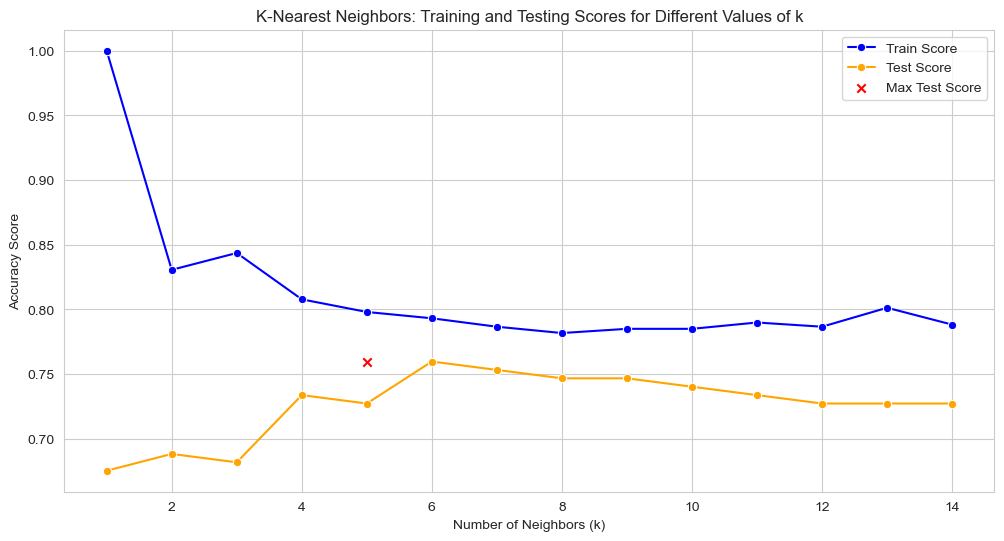

In [34]:
# Plotting the training and testing scores

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 15), y=train_scores, marker='o', label='Train Score', color='blue')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score', color='orange')


plt.scatter(test_scores_ind, [max_test_score] * len(test_scores_ind), color='red', marker='x', label='Max Test Score')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('K-Nearest Neighbors: Training and Testing Scores for Different Values of k')
plt.legend()
plt.show()

In [35]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7337662337662337

In [36]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [37]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [39]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7727272727272727


In [40]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
Y_pred = classifier.predict(X_test)
confusion_matrix(Y_test,Y_pred)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,91,9,100
1,26,28,54
All,117,37,154


Text(0.5, 25.52222222222222, 'Predicted label')

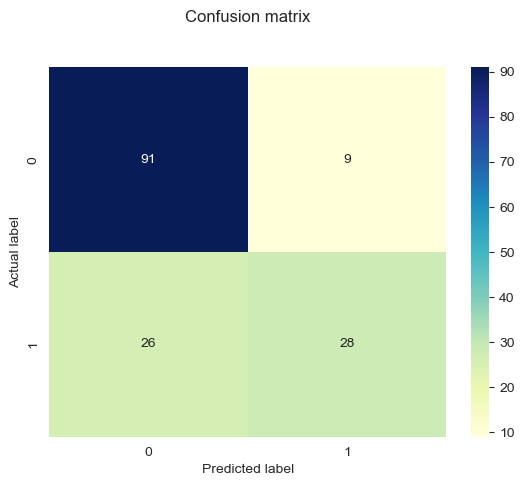

In [41]:
y_pred = classifier.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [43]:
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))


In [44]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')
     

[1]
The person is diabetic


In [45]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
